In [271]:
# Day 4 Read data from file downloaded
import pandas as pd
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [274]:
# Day 4 question_1
comp = data['Company Name'].unique()
comp_num = comp.size
print('Number of different companies is', comp_num)

Number of different companies is 439


In [276]:
# Day 4 question_2
Jobs = data['Job created'][data['Borough'] == 'Queens'].sum()
print('The number of jobs created for businesses in Queens is', int(Jobs))

The number of jobs created for businesses in Queens is 102


In [277]:
# Day 4 question_3
bool_series = pd.notnull(data['company email'])
comp_em = data[bool_series]
Uniq_email = comp_em['company email'].unique()
email_num = Uniq_email.size
print('The number of different unique email domains is', email_num)

The number of different unique email domains is 420


In [208]:
# Day 4 question_4 and question_5
busies = data.groupby('NTA')
df = busies.filter(lambda x: x['Company Name'].count() >= 5)

df['Total Savings'] = df['Total Savings'].str.replace(',','')
df['Total Savings'] = df['Total Savings'].astype(float)

reslut = df.groupby('NTA').agg({'Total Savings': 'mean', 'Job created':'sum'})
reslut.rename(columns = {'Total Savings':'Average_Total Savings', 'Job created':'Total_Job created'}, inplace = True)
reslut.to_csv('reslut.csv')

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Total Job Created')]

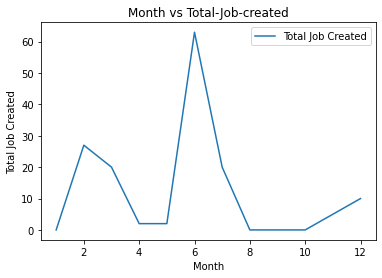

In [270]:
# Day 5 plot
data['Effective Date'].head(1)
data['Effective Date'] = pd.to_datetime(data['Effective Date'])

Jobs = data.groupby(data['Effective Date'].dt.month).agg({'Job created':sum})
Jobs.rename(columns = {'Job created':'Total Job Created'}, inplace = True)
Jobs.index.names = ['Month']

ax = Jobs.plot(y='Total Job Created', use_index=True, kind = 'line', title = 'Month vs Total-Job-created')
ax.set(xlabel = 'Month', ylabel = 'Total Job Created')

Text(0.5, 0.98, 'Log Average_Total Savings')

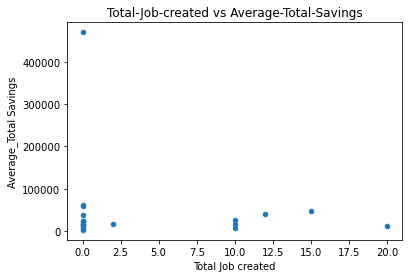

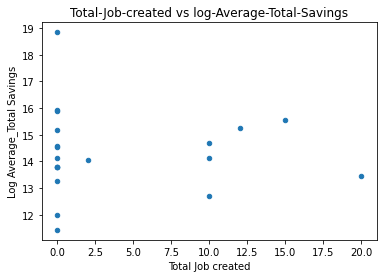

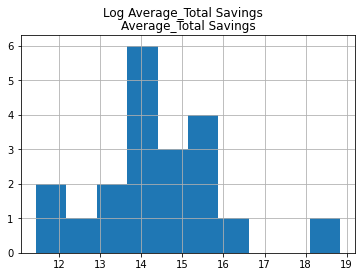

In [269]:
# Day 5 plots
import numpy as np
import pylab as pl
dat = pd.read_csv("C:/Users/beta8/Desktop/reslut.csv")

ax = dat.plot(x ='Total_Job created', y='Average_Total Savings', kind = 'scatter', title = 'Total-Job-created vs Average-Total-Savings')
ax.set(xlabel = 'Total Job created', ylabel = 'Average_Total Savings')

dat['Average_Total Savings'] = np.log2(dat['Average_Total Savings'])
ax1 = dat.plot(x ='Total_Job created', y='Average_Total Savings', kind = 'scatter', title = 'Total-Job-created vs log-Average-Total-Savings')
ax1.set(xlabel = 'Total Job created', ylabel = 'Log Average_Total Savings')

dat.hist(column='Average_Total Savings')
pl.suptitle('Log Average_Total Savings')